In [1]:
from sprawl import vignette, plotting, metrics
import matplotlib.pyplot as plt

In [2]:
#get a list of cells from one of the included datasets
sample = vignette.m1s4_hdf5()
cells = sample.cells()
display(cells)

cell = cells[0]
print(cell)

[Cell-100042292675978612289781789372249900646-L6_IT_3,
 Cell-100070027782195876079415879748834848836-L45_IT_3,
 Cell-100119755510557417791056480683612014915-L6_CT_5,
 Cell-100120630789554574689109334609716249164-Pvalb_4,
 Cell-100130021246024550058891566536662366819-L45_IT_5,
 Cell-100135768499645921485399243103156491707-L23_IT_3,
 Cell-100196112419082045488014652263334825841-L23_IT_3,
 Cell-100239797373311630209489970275162397033-L5_ET_3,
 Cell-100254037659267601430852197780862098731-L6_IT_3,
 Cell-100272875882225814505272431346995414912-L45_IT_2,
 Cell-100301297440121711165243332589431955393-L6_IT_2,
 Cell-100315078070569273470311005960792658409-L5_IT_1,
 Cell-100318456929671597800426226497319235606-L6_CT_1,
 Cell-100431609524707826624339835425318791388-L23_IT_3,
 Cell-1004824975624069210559970798193577754-Vip_7,
 Cell-100574930949484809578634906420360731463-L5_ET_4,
 Cell-10057681216051175595750593230904675495-L6b_3,
 Cell-100686711639775161991991549599488005380-Pvalb_4,
 Cell-10071

Cell-100042292675978612289781789372249900646-L6_IT_3


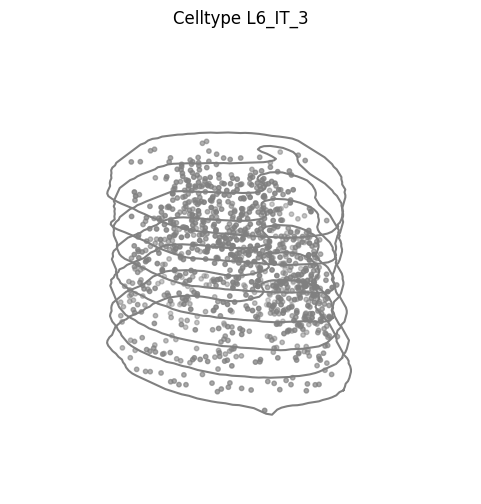

In [3]:
#plot the first cell in the list in 3D
fig,ax = plotting.plot_cell_3D(cell)
plt.show()
plt.close()

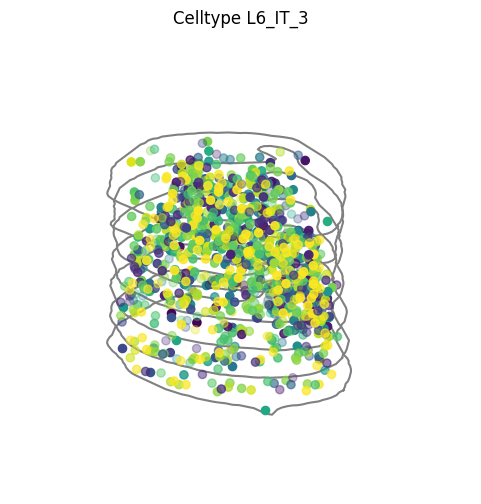

In [4]:
#plot each gene in a different color and hide the legend since it has 129 genes
fig,ax = plotting.plot_cell_3D(cell, rainbow=True)
ax.get_legend().remove()
plt.show()
plt.close()

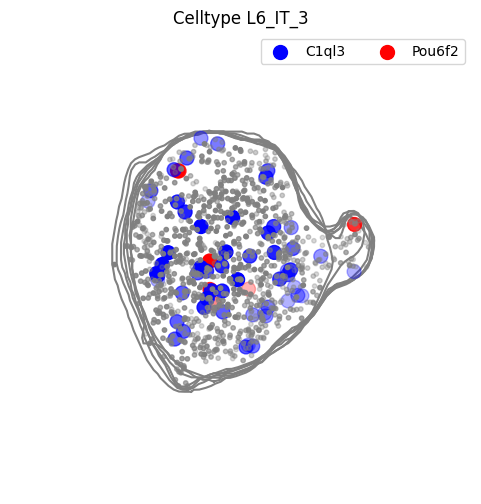

In [5]:
#plot again coloring specific genes of interest and adjust viewing angle
fig,ax = plotting.plot_cell_3D(cell, gene_colors={'C1ql3':'blue','Pou6f2':'red'})
ax.view_init(elev=90, azim=0)
plt.show()
plt.close()

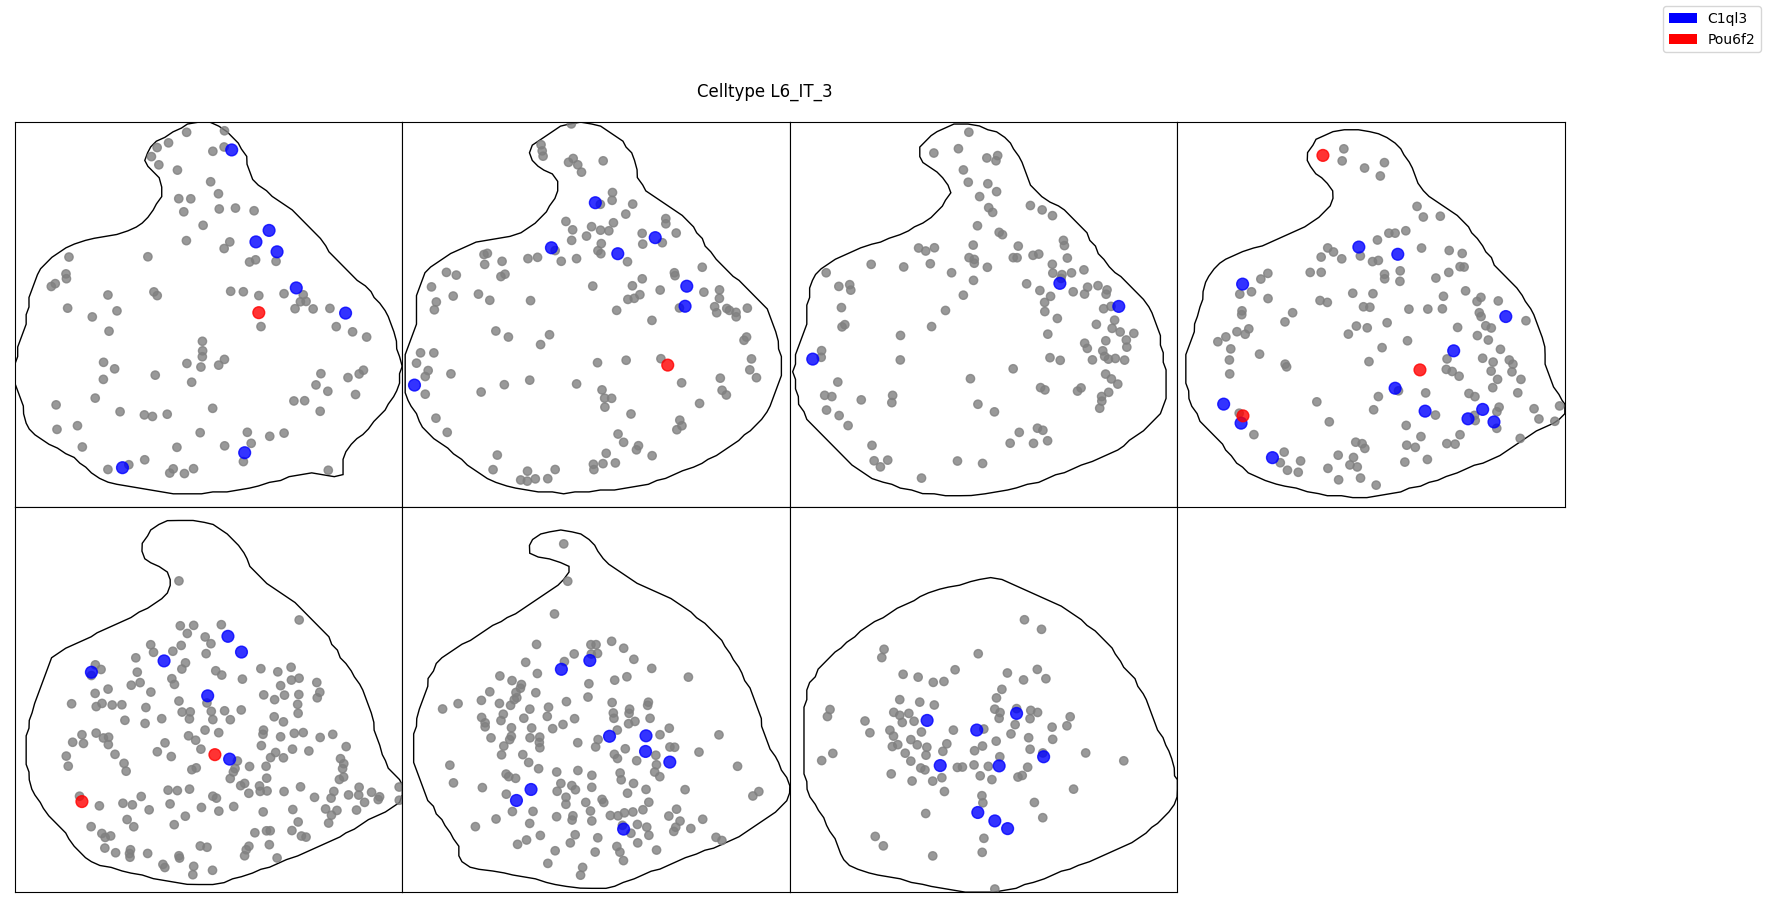

In [6]:
#plot the same cell but each zslice separately
fig,ax = plotting.plot_cell_zslices(cell, gene_colors={'C1ql3':'blue','Pou6f2':'red'})
plt.show()
plt.close()

In [7]:
#Calculate sprawl periphery scores for each gene in this cell
periph_scores_df = metrics._peripheral(cell)

#display the sprawl periphery gene/cell scores for C1ql3 and Pou6f2
#
# C1ql3 has a score near 0, about as peripheral as expected by chance, and low variance since it has 55 spots
# Pou6f2 has a negative score, meaning it is less peripheral than expected by chance, but has a larger variance

periph_scores_df[
    periph_scores_df['gene'].isin(['C1ql3','Pou6f2'])
]

,metric,cell_id,annotation,num_spots,gene,num_gene_spots,score,variance
16,periph,100042292675978612289781789372249900646,L6_IT_3,1015,C1ql3,55,-0.051282,0.016642
85,periph,100042292675978612289781789372249900646,L6_IT_3,1015,Pou6f2,7,-0.583826,0.110672
